In [1]:
#!/usr/bin/env python

import sys
import time
from pathlib import Path
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [2]:
start_time = time.time()
# Script to compute similarity matrices for subregion electrostatics of each PDB. Will need to plot them too. Hmmm -> matrix heatmap.

## Load the data ##

pdbs = []
potentials = {}
data_folder = Path('data')
with open(data_folder / 'spike_variants_regions_pot.csv', 'r') as f:
    header = next(f).split(',')
    print('column names:', header)
    data = defaultdict(dict)
    for line in f:
        mm = line.split(',')

        if len(mm) == 3:
            key_AG, key_region, potential = mm
            # key_region = int(key_region.split['_'][-1]) # transform region key to int?
            data[key_AG].update({key_region: float(potential)})

data = dict(data)

column names: ['PDB ID', ' Region within RBD', ' Delphi Electrostatic Potential\n']


In [3]:
import pandas as pd
df = pd.DataFrame(data).T
df

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_20
7eb5,105.733288,48.996252,182.633417,-58.179588,19.279892,84.964848,11.511399,154.123688,-20.943992,-171.116094,85.601833,18.347770,324.781363,-270.917412,39.527823,-22.275150,65.975236,189.062630,38.382067,97.243434
7lwm,2.728950,37.652959,42.144594,-16.587984,10.467289,-53.346604,-160.719134,13.478362,-124.022740,-82.758934,-25.442409,78.216085,46.049152,-33.868066,44.039830,-34.828870,-0.451154,58.882362,-107.748322,-118.469267
7lwt,38.318791,51.873752,80.430173,-2.087168,-36.328389,0.065587,-84.028737,11.021777,-37.174521,-42.943978,-26.057994,63.140282,91.651251,30.285047,3.643663,-133.040368,0.951035,-21.654611,-68.555238,-11.037852
7lwu,6.671132,95.780381,21.612014,9.478145,-4.289964,-16.498972,-46.600944,101.844780,-4.597313,-122.895027,75.979782,45.560212,-32.979004,-30.496692,11.426561,-133.161554,18.729077,64.259521,-29.035913,-13.117407
7lww,18.892754,128.647096,-21.722109,49.023930,81.542039,25.045511,-44.034874,157.389588,-88.365300,-0.228734,83.226555,57.402930,2.858726,82.056162,-17.458189,54.656738,71.666256,82.707445,42.513123,-6.949520
7lyn,6.813257,157.175105,-90.645713,40.418624,77.494449,131.040175,-53.442855,61.340373,-75.700834,-93.682043,-7.359164,125.058967,185.099128,-97.798136,3.104570,94.392428,124.501457,-12.273772,-22.667928,-22.006694
7m8k,-15.991499,123.602680,230.719530,-44.358050,91.763857,13.966446,135.333078,83.105920,-35.824606,-149.254840,127.740882,47.324684,-25.304733,37.112461,22.936461,84.155688,-33.993092,-47.580770,-20.197079,84.697077
7n8h,24.212840,-8.367154,124.769159,-67.157038,0.000527,35.946842,-35.134737,67.521835,81.505996,-51.337341,-10.852914,81.159393,137.427687,-127.364267,-17.031938,-31.489113,96.169564,-16.115242,-47.770832,24.929258


All 8 pdbs have 20 regions defined: 

In [4]:
df.notna().sum(axis=1).value_counts().sort_index(ascending=False)

20    8
dtype: int64

In [5]:
df = df.loc[:,'region_1':'region_20'].dropna()
df

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_20
7eb5,105.733288,48.996252,182.633417,-58.179588,19.279892,84.964848,11.511399,154.123688,-20.943992,-171.116094,85.601833,18.347770,324.781363,-270.917412,39.527823,-22.275150,65.975236,189.062630,38.382067,97.243434
7lwm,2.728950,37.652959,42.144594,-16.587984,10.467289,-53.346604,-160.719134,13.478362,-124.022740,-82.758934,-25.442409,78.216085,46.049152,-33.868066,44.039830,-34.828870,-0.451154,58.882362,-107.748322,-118.469267
7lwt,38.318791,51.873752,80.430173,-2.087168,-36.328389,0.065587,-84.028737,11.021777,-37.174521,-42.943978,-26.057994,63.140282,91.651251,30.285047,3.643663,-133.040368,0.951035,-21.654611,-68.555238,-11.037852
7lwu,6.671132,95.780381,21.612014,9.478145,-4.289964,-16.498972,-46.600944,101.844780,-4.597313,-122.895027,75.979782,45.560212,-32.979004,-30.496692,11.426561,-133.161554,18.729077,64.259521,-29.035913,-13.117407
7lww,18.892754,128.647096,-21.722109,49.023930,81.542039,25.045511,-44.034874,157.389588,-88.365300,-0.228734,83.226555,57.402930,2.858726,82.056162,-17.458189,54.656738,71.666256,82.707445,42.513123,-6.949520
7lyn,6.813257,157.175105,-90.645713,40.418624,77.494449,131.040175,-53.442855,61.340373,-75.700834,-93.682043,-7.359164,125.058967,185.099128,-97.798136,3.104570,94.392428,124.501457,-12.273772,-22.667928,-22.006694
7m8k,-15.991499,123.602680,230.719530,-44.358050,91.763857,13.966446,135.333078,83.105920,-35.824606,-149.254840,127.740882,47.324684,-25.304733,37.112461,22.936461,84.155688,-33.993092,-47.580770,-20.197079,84.697077
7n8h,24.212840,-8.367154,124.769159,-67.157038,0.000527,35.946842,-35.134737,67.521835,81.505996,-51.337341,-10.852914,81.159393,137.427687,-127.364267,-17.031938,-31.489113,96.169564,-16.115242,-47.770832,24.929258


continue with remaining complete list of antigens

In [6]:
def lower_triangle(df):
    """Compute the correlation matrix, returning only unique values."""
    lower_triangle = pd.DataFrame(
        np.tril(np.ones(df.shape), -1)).astype(bool)
    lower_triangle.index, lower_triangle.columns = df.index, df.columns
    return df.where(lower_triangle)

In [53]:
dict_dist= {}
metrics = ['cosine', 'euclidean', 'l2', 'manhattan', 'l1', 'hamming', 'chebyshev'] # 'jaccard' excluded as it's for binary data
for _metric in metrics:
    dict_dist[_metric] = pd.DataFrame(pairwise_distances(X=df, metric=_metric), index=df.index, columns=df.index)
    dict_dist[_metric] = lower_triangle(dict_dist[_metric]).stack()
df_metrics = pd.DataFrame(dict_dist)
df_metrics

cosine   euclidean          l2    manhattan           l1  \
7lwm 7eb5  0.757206  598.759044  598.759044  2210.073468  2210.073468   
7lwt 7eb5  0.685310  565.363960  565.363960  2080.534217  2080.534217   
     7lwm  0.368256  245.904205  245.904205   901.232982   901.232982   
7lwu 7eb5  0.601529  544.340407  544.340407  1798.349430  1798.349430   
     7lwm  0.523092  298.009888  298.009888  1078.364530  1078.364530   
     7lwt  0.490647  253.374268  253.374268   893.544774   893.544774   
7lww 7eb5  0.797520  610.400554  610.400554  1967.967509  1967.967509   
     7lwm  0.782033  388.136227  388.136227  1562.190634  1562.190634   
     7lwt  0.951905  384.402623  384.402623  1427.199278  1427.199278   
     7lwu  0.580366  312.210758  312.210758  1053.175030  1053.175030   
7lyn 7eb5  0.509197  528.755817  528.755817  2078.921853  2078.921853   
     7lwm  0.645148  414.085452  414.085452  1594.915055  1594.915055   
     7lwt  0.777385  423.576148  423.576148  1485.262723  1485.262723   
     7lwu  0.781218  433.300394  433.300394  1463.377633  1463.377633   
     7lww  0.489906  363.146904  363.146904  1248.443190  1248.443190   
7m8k 7eb5  0.663842  596.237584  596.237584  1893.293910  1893.293910   
     7lwm  1.024225  520.055890  520.055890  1887.218285  1887.218285   
     7lwt  0.927741  460.718570  460.718570  1594.549395  1594.549395   
     7lwu  0.699523  415.683430  415.683430  1327.059785  1327.059785   
     7lww  0.689626  429.471196  429.471196  1450.169284  1450.169284   
     7lyn  0.880841  540.213457  540.213457  1791.046322  1791.046322   
7n8h 7eb5  0.264697  422.564916  422.564916  1579.285856  1579.285856   
     7lwm  0.749723  377.017893  377.017893  1358.849431  1358.849431   
     7lwt  0.524436  285.379243  285.379243  1004.820031  1004.820031   
     7lwu  0.712262  341.926009  341.926009  1296.101941  1296.101941   
     7lww  1.054276  445.518415  445.518415  1611.083360  1611.083360   
     7lyn  0.578048  390.640396  390.640396  1277.421909  1277.421909   
     7m8k  0.773218  451.066902  451.066902  1720.187870  1720.187870   

           hamming   chebyshev  
7lwm 7eb5      1.0  278.732210  
7lwt 7eb5      1.0  301.202459  
     7lwm      1.0  107.431415  
7lwu 7eb5      1.0  357.760366  
     7lwm      1.0  119.425427  
     7lwt      1.0  124.630255  
7lww 7eb5      1.0  352.973574  
     7lwm      1.0  150.261445  
     7lwt      1.0  187.697105  
     7lwu      1.0  187.818292  
7lyn 7eb5      1.0  273.279130  
     7lwm      1.0  184.386778  
     7lwt      1.0  227.432795  
     7lwu      1.0  227.553982  
     7lww      1.0  182.240402  
7m8k 7eb5      1.0  350.086095  
     7lwm      1.0  296.052212  
     7lwt      1.0  219.361815  
     7lwu      1.0  217.317242  
     7lww      1.0  252.441639  
     7lyn      1.0  321.365242  
7n8h 7eb5      1.0  205.177872  
     7lwm      1.0  205.528736  
     7lwt      1.0  157.649314  
     7lwu      1.0  170.406690  
     7lww      1.0  209.420429  
     7lyn      1.0  215.414872  
     7m8k      1.0  170.467816

## Normalization

$ z = \frac{x - min(X)}{max(X)-min(X)}$

where
- $x$: a single correlation value of a metric
- $X$: the set of correlations for a single metric
- $z$: a singe *normalized* correlation value of a metric


In [8]:
stats_metrics = df_metrics.describe()
stats_metrics

,cosine,euclidean,l2,manhattan,l1,hamming,chebyshev
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000
mean,0.688685,430.009305,430.009305,1522.665703,1522.665703,1.0,223.339843
std,0.187054,103.632748,103.632748,360.594082,360.594082,0.0,70.517866
min,0.264697,245.904205,245.904205,893.544774,893.544774,1.0,107.431415
25%,0.564645,373.550146,373.550146,1291.431933,1291.431933,1.0,179.297256
50%,0.694575,423.070532,423.070532,1523.726678,1523.726678,1.0,212.417650
75%,0.781422,522.230872,522.230872,1792.872099,1792.872099,1.0,274.642400
max,1.054276,610.400554,610.400554,2210.073468,2210.073468,1.0,357.760366


In [69]:
X_min = stats_metrics.loc['min'] ## doesn't give correct answer, because of dtype errors?
X_max = stats_metrics.loc['max'] ## doesn't give correct answer?
#df_metrics['cosine'] = pd.to_numeric(df_metrics.cosine)
#df_metrics['cosine'].max()
X_min = df_metrics.min()
X_max = df_metrics.max()
X_max

cosine          1.054276
euclidean     610.400554
l2            610.400554
manhattan    2210.073468
l1           2210.073468
hamming         1.000000
chebyshev     357.760366
dtype: float64

In [70]:
df_metrics_normalized = (df_metrics - X_min) / (X_max - X_min)
df_metrics_normalized

cosine  euclidean        l2  manhattan        l1  hamming  \
7lwm 7eb5  0.623762   0.968061  0.968061   1.000000  1.000000      NaN   
7lwt 7eb5  0.532705   0.876442  0.876442   0.901605  0.901605      NaN   
     7lwm  0.131156   0.000000  0.000000   0.005840  0.005840      NaN   
7lwu 7eb5  0.426596   0.818763  0.818763   0.687265  0.687265      NaN   
     7lwm  0.327257   0.142953  0.142953   0.140384  0.140384      NaN   
     7lwt  0.286165   0.020494  0.020494   0.000000  0.000000      NaN   
7lww 7eb5  0.674819   1.000000  1.000000   0.816103  0.816103      NaN   
     7lwm  0.655205   0.390215  0.390215   0.507886  0.507886      NaN   
     7lwt  0.870347   0.379972  0.379972   0.405350  0.405350      NaN   
     7lwu  0.399794   0.181913  0.181913   0.121251  0.121251      NaN   
7lyn 7eb5  0.309658   0.776007  0.776007   0.900381  0.900381      NaN   
     7lwm  0.481840   0.461407  0.461407   0.532742  0.532742      NaN   
     7lwt  0.649318   0.487445  0.487445   0.449453  0.449453      NaN   
     7lwu  0.654172   0.514124  0.514124   0.432830  0.432830      NaN   
     7lww  0.285226   0.321657  0.321657   0.269571  0.269571      NaN   
7m8k 7eb5  0.505516   0.961144  0.961144   0.759383  0.759383      NaN   
     7lwm  0.961941   0.752138  0.752138   0.754768  0.754768      NaN   
     7lwt  0.839744   0.589346  0.589346   0.532464  0.532464      NaN   
     7lwu  0.550706   0.465791  0.465791   0.329286  0.329286      NaN   
     7lww  0.538172   0.503618  0.503618   0.422797  0.422797      NaN   
     7lyn  0.780345   0.807441  0.807441   0.681718  0.681718      NaN   
7n8h 7eb5  0.000000   0.484671  0.484671   0.520871  0.520871      NaN   
     7lwm  0.614284   0.359712  0.359712   0.353433  0.353433      NaN   
     7lwt  0.328959   0.108300  0.108300   0.084522  0.084522      NaN   
     7lwu  0.566839   0.263437  0.263437   0.305772  0.305772      NaN   
     7lww  1.000000   0.547644  0.547644   0.545023  0.545023      NaN   
     7lyn  0.396859   0.397085  0.397085   0.291583  0.291583      NaN   
     7m8k  0.644040   0.562866  0.562866   0.627896  0.627896      NaN   

           chebyshev  
7lwm 7eb5   0.684303  
7lwt 7eb5   0.774066  
     7lwm   0.000000  
7lwu 7eb5   1.000000  
     7lwm   0.047913  
     7lwt   0.068705  
7lww 7eb5   0.980878  
     7lwm   0.171095  
     7lwt   0.320641  
     7lwu   0.321125  
7lyn 7eb5   0.662519  
     7lwm   0.307417  
     7lwt   0.479375  
     7lwu   0.479859  
     7lww   0.298843  
7m8k 7eb5   0.969343  
     7lwm   0.753492  
     7lwt   0.447133  
     7lwu   0.438966  
     7lww   0.579279  
     7lyn   0.854611  
7n8h 7eb5   0.390472  
     7lwm   0.391874  
     7lwt   0.200608  
     7lwu   0.251570  
     7lww   0.407420  
     7lyn   0.431366  
     7m8k   0.251814

## Plotting the mean metrics heatmap

In [71]:
mean_metrics = df_metrics_normalized.mean(axis=1).unstack()
mean_metrics

,7eb5,7lwm,7lwt,7lwu,7lww,7lyn,7m8k
7lwm,0.874031,NaN,NaN,NaN,NaN,NaN,NaN
7lwt,0.810477,0.023806,NaN,NaN,NaN,NaN,NaN
7lwu,0.739776,0.156974,0.065976,NaN,NaN,NaN,NaN
7lww,0.881317,0.437084,0.460272,0.221208,NaN,NaN,NaN
7lyn,0.720825,0.462926,0.500415,0.504656,0.294421,NaN,NaN
7m8k,0.819319,0.788208,0.588416,0.429971,0.495047,0.768879,NaN
7n8h,0.400259,0.405408,0.152535,0.326138,0.598792,0.367594,0.54623


[Text(0, 0.5, '7lwm'),
 Text(0, 1.5, '7lwt'),
 Text(0, 2.5, '7lwu'),
 Text(0, 3.5, '7lww'),
 Text(0, 4.5, '7lyn'),
 Text(0, 5.5, '7m8k'),
 Text(0, 6.5, '7n8h')]

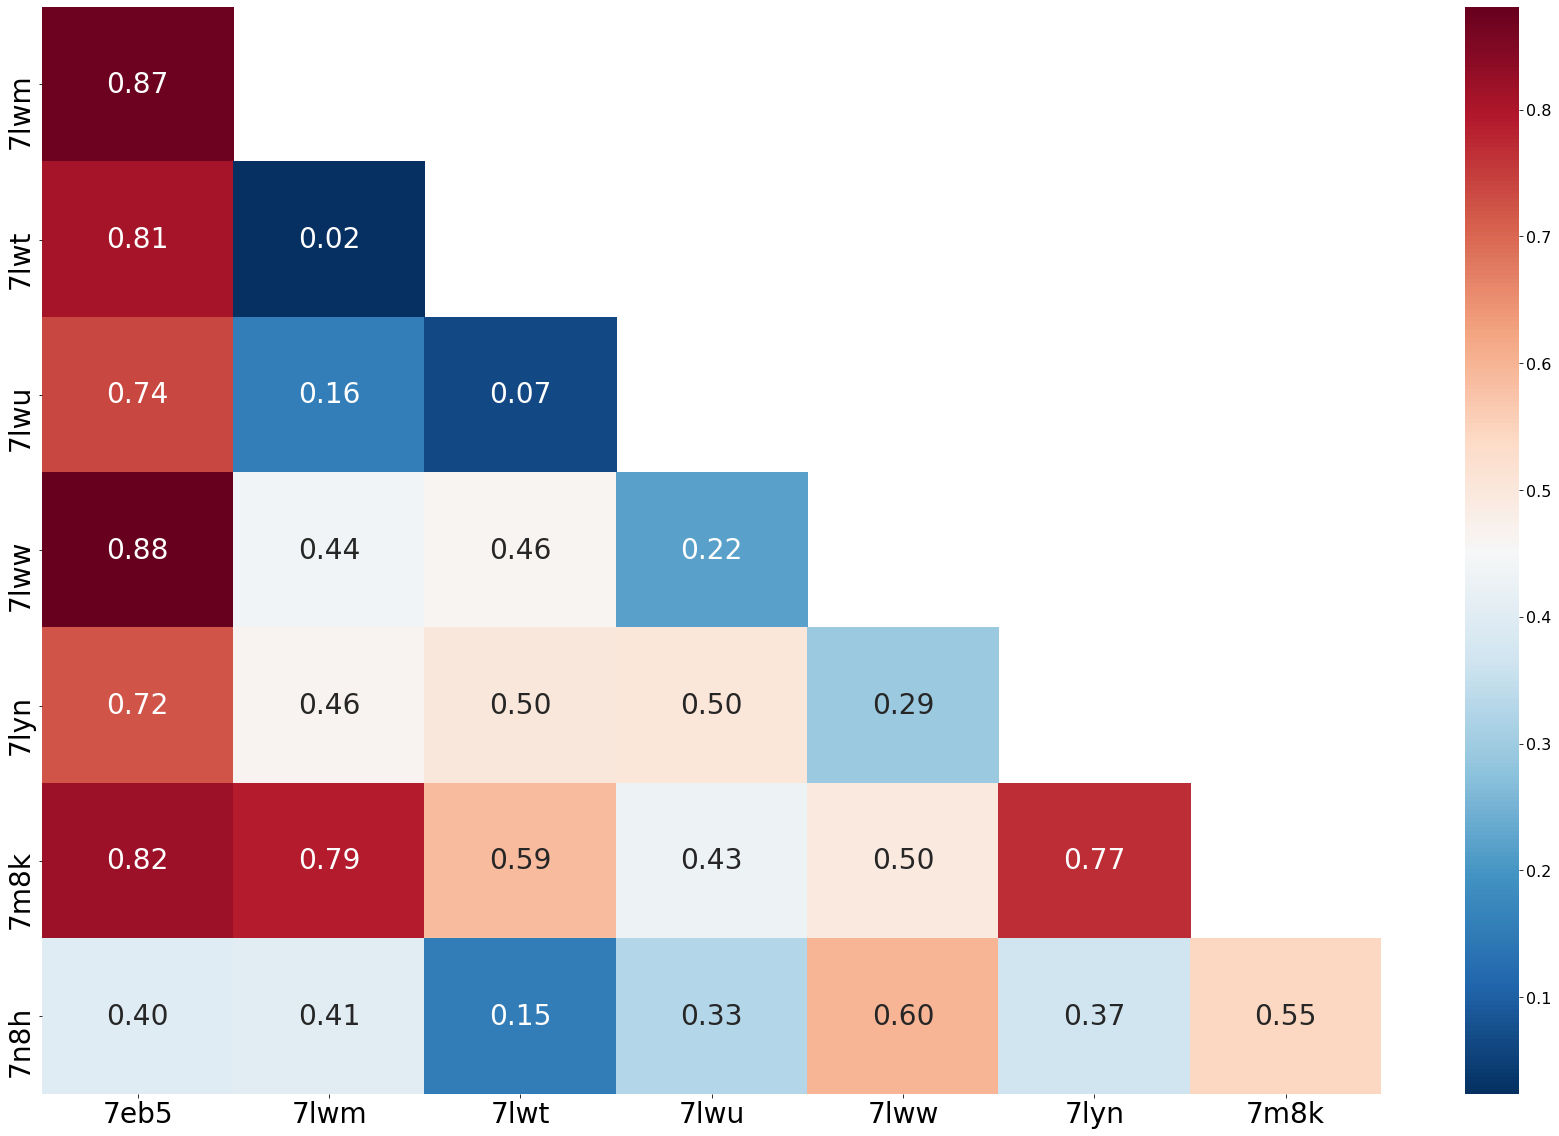

In [72]:
# Set up the matplotlib figure
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

fig, ax = plt.subplots(figsize=(30,20)) 

ax = sns.heatmap(mean_metrics, annot=True, fmt='0.2f', cmap="RdBu_r", ax=ax, annot_kws={"size": 28} ) #annot=labels, fmt='',annot_kws={"size": 14}, cmap="RdBu_r") #fmt="0.2f",  cmap="RdBu_r")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 28)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 28)


## Plot Histogram of similarity matrix values

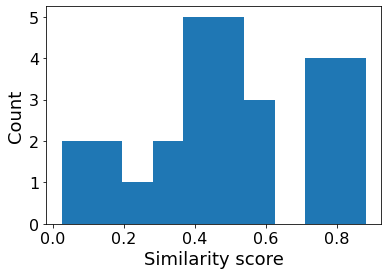

In [73]:
plt.hist(mean_metrics.to_numpy().flatten())
plt.ylabel('Count', fontsize=18)
plt.xlabel('Similarity score', fontsize=18)

plt.show()

### Compute and plot 'Super' similarity entries by taking average of similarity scores and select those with average above 0.6 (threshold)

In [74]:
rows_sum = mean_metrics.sum(axis=1)
rows_sum


7lwm    0.874031
7lwt    0.834283
7lwu    0.962726
7lww    1.999880
7lyn    2.483243
7m8k    3.889840
7n8h    2.796956
dtype: float64

In [75]:
columns_sum = mean_metrics.sum(axis=0)
columns_sum

7eb5    5.246005
7lwm    2.274405
7lwt    1.767614
7lwu    1.481973
7lww    1.388260
7lyn    1.136472
7m8k    0.546230
dtype: float64

In [76]:
row_sum = np.concatenate(([0],rows_sum.to_numpy())) ## insert leading zero.
row_sum
column_sum = np.concatenate((columns_sum.to_numpy(),[0])) ## insert last zero.
column_sum

array([5.24600454, 2.27440495, 1.76761449, 1.48197299, 1.38826   ,
       1.13647248, 0.54622984, 0.        ])

Add arrays together, and plot histogram

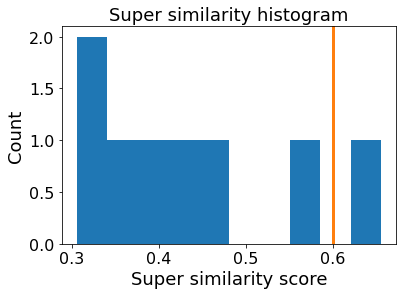

In [77]:
super_similarity = ( row_sum + column_sum ) / len( row_sum )

plt.hist(super_similarity)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Super similarity score', fontsize=18)

plt.axvline(x=0.6,lw=3,c='tab:orange')

plt.title('Super similarity histogram', fontsize=18)

plt.show()

Get indices of super similars

In [78]:
pdb_indices = []
for index in range(0, len(super_similarity)) :
    if super_similarity[index] > 0.6:
        pdb_indices.append(index)
        
pdb_indices

[0]

Get pdb ids of super similars

In [79]:
row_labels = np.array(mean_metrics.index)
row_labels

array(['7lwm', '7lwt', '7lwu', '7lww', '7lyn', '7m8k', '7n8h'],
      dtype=object)

In [80]:
column_labels = np.array(mean_metrics.columns)
column_labels

array(['7eb5', '7lwm', '7lwt', '7lwu', '7lww', '7lyn', '7m8k'],
      dtype=object)

In [81]:
all_pdb_ids = np.insert(row_labels,0,column_labels[0])
all_pdb_ids

array(['7eb5', '7lwm', '7lwt', '7lwu', '7lww', '7lyn', '7m8k', '7n8h'],
      dtype=object)

In [82]:
super_similar_pdbs = all_pdb_ids[pdb_indices]
super_similar_pdbs

array(['7eb5'], dtype=object)

## Region by region comparison

In [134]:
region = 20
residues = 330

## df.iloc[:,0] ## column 1 = region 1
dict_dist= {}
metrics = ['cosine', 'euclidean', 'l2', 'manhattan', 'l1', 'hamming', 'chebyshev'] # 'jaccard' excluded as it's for binary data
for _metric in metrics:
    dict_dist[_metric] = pd.DataFrame(pairwise_distances(X=df[['region_{}'.format(region)]].to_numpy(), metric=_metric), index=df.index, columns=df.index)
    dict_dist[_metric] = lower_triangle(dict_dist[_metric]).stack()
df_metrics = pd.DataFrame(dict_dist)
df_metrics

cosine   euclidean          l2   manhattan          l1  hamming  \
7lwm 7eb5     2.0  215.712701  215.712701  215.712701  215.712701      1.0   
7lwt 7eb5     2.0  108.281286  108.281286  108.281286  108.281286      1.0   
     7lwm     0.0  107.431415  107.431415  107.431415  107.431415      1.0   
7lwu 7eb5     2.0  110.360841  110.360841  110.360841  110.360841      1.0   
     7lwm     0.0  105.351860  105.351860  105.351860  105.351860      1.0   
     7lwt     0.0    2.079555    2.079555    2.079555    2.079555      1.0   
7lww 7eb5     2.0  104.192954  104.192954  104.192954  104.192954      1.0   
     7lwm     0.0  111.519747  111.519747  111.519747  111.519747      1.0   
     7lwt     0.0    4.088332    4.088332    4.088332    4.088332      1.0   
     7lwu     0.0    6.167887    6.167887    6.167887    6.167887      1.0   
7lyn 7eb5     2.0  119.250128  119.250128  119.250128  119.250128      1.0   
     7lwm     0.0   96.462573   96.462573   96.462573   96.462573      1.0   
     7lwt     0.0   10.968842   10.968842   10.968842   10.968842      1.0   
     7lwu     0.0    8.889287    8.889287    8.889287    8.889287      1.0   
     7lww     0.0   15.057174   15.057174   15.057174   15.057174      1.0   
7m8k 7eb5     0.0   12.546358   12.546358   12.546358   12.546358      1.0   
     7lwm     2.0  203.166344  203.166344  203.166344  203.166344      1.0   
     7lwt     2.0   95.734928   95.734928   95.734928   95.734928      1.0   
     7lwu     2.0   97.814483   97.814483   97.814483   97.814483      1.0   
     7lww     2.0   91.646596   91.646596   91.646596   91.646596      1.0   
     7lyn     2.0  106.703770  106.703770  106.703770  106.703770      1.0   
7n8h 7eb5     0.0   72.314177   72.314177   72.314177   72.314177      1.0   
     7lwm     2.0  143.398525  143.398525  143.398525  143.398525      1.0   
     7lwt     2.0   35.967110   35.967110   35.967110   35.967110      1.0   
     7lwu     2.0   38.046665   38.046665   38.046665   38.046665      1.0   
     7lww     2.0   31.878777   31.878777   31.878777   31.878777      1.0   
     7lyn     2.0   46.935951   46.935951   46.935951   46.935951      1.0   
     7m8k     0.0   59.767819   59.767819   59.767819   59.767819      1.0   

            chebyshev  
7lwm 7eb5  215.712701  
7lwt 7eb5  108.281286  
     7lwm  107.431415  
7lwu 7eb5  110.360841  
     7lwm  105.351860  
     7lwt    2.079555  
7lww 7eb5  104.192954  
     7lwm  111.519747  
     7lwt    4.088332  
     7lwu    6.167887  
7lyn 7eb5  119.250128  
     7lwm   96.462573  
     7lwt   10.968842  
     7lwu    8.889287  
     7lww   15.057174  
7m8k 7eb5   12.546358  
     7lwm  203.166344  
     7lwt   95.734928  
     7lwu   97.814483  
     7lww   91.646596  
     7lyn  106.703770  
7n8h 7eb5   72.314177  
     7lwm  143.398525  
     7lwt   35.967110  
     7lwu   38.046665  
     7lww   31.878777  
     7lyn   46.935951  
     7m8k   59.767819

Text(0.5, 1.0, 'Dissimilarity between Region20 Residues 520-530')

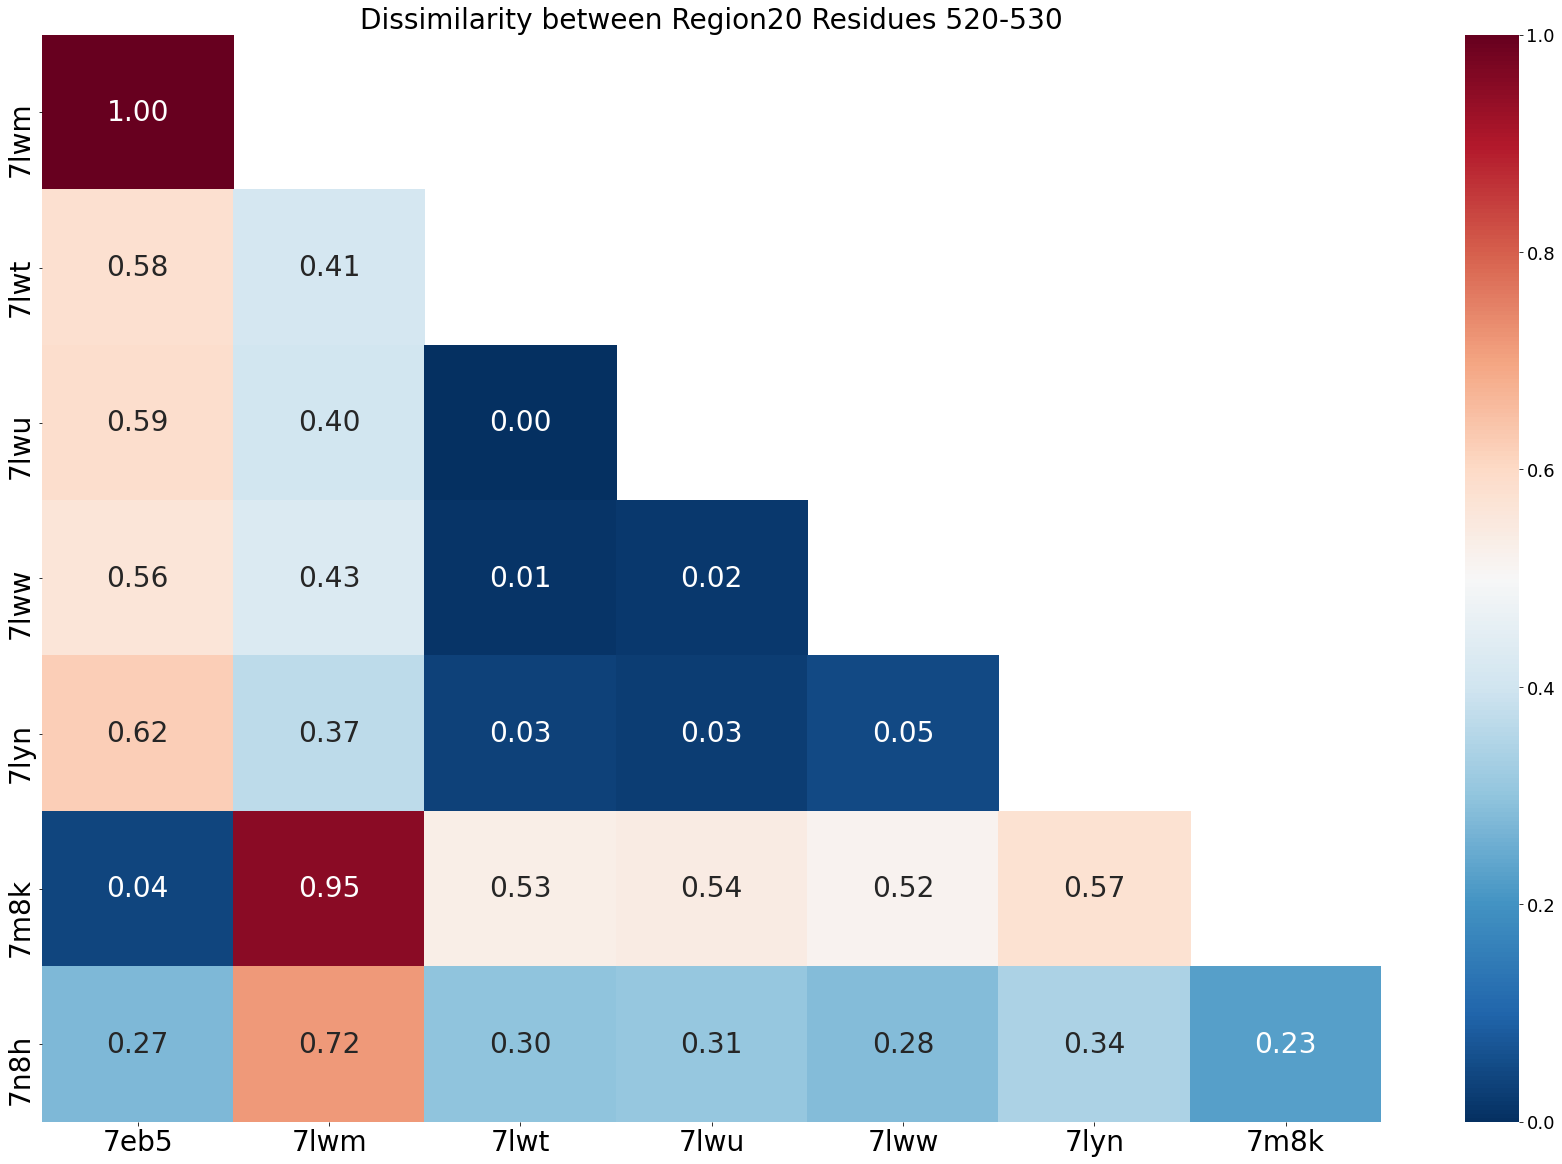

In [135]:
stats_metrics = df_metrics.describe()
X_min = stats_metrics.loc['min']
X_max = stats_metrics.loc['max']
df_metrics_normalized = (df_metrics - X_min) / (X_max - X_min)
mean_metrics = df_metrics_normalized.mean(axis=1).unstack()

# Set up the matplotlib figure
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)

fig, ax = plt.subplots(figsize=(30,20)) 

ax = sns.heatmap(mean_metrics, annot=True, fmt='0.2f', cmap="RdBu_r", ax=ax, annot_kws={"size": 28} ) #annot=labels, fmt='',annot_kws={"size": 14}, cmap="RdBu_r") #fmt="0.2f",  cmap="RdBu_r")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 28)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 28)

plt.title('Dissimilarity between Region{} Residues {}-{}'.format(region,residues+region*10 - 10,residues+region*10), fontsize = 28)

## Pairwise Comparison

Text(0.5, 1.0, 'Dissimilarity between 7lyn 7eb5')

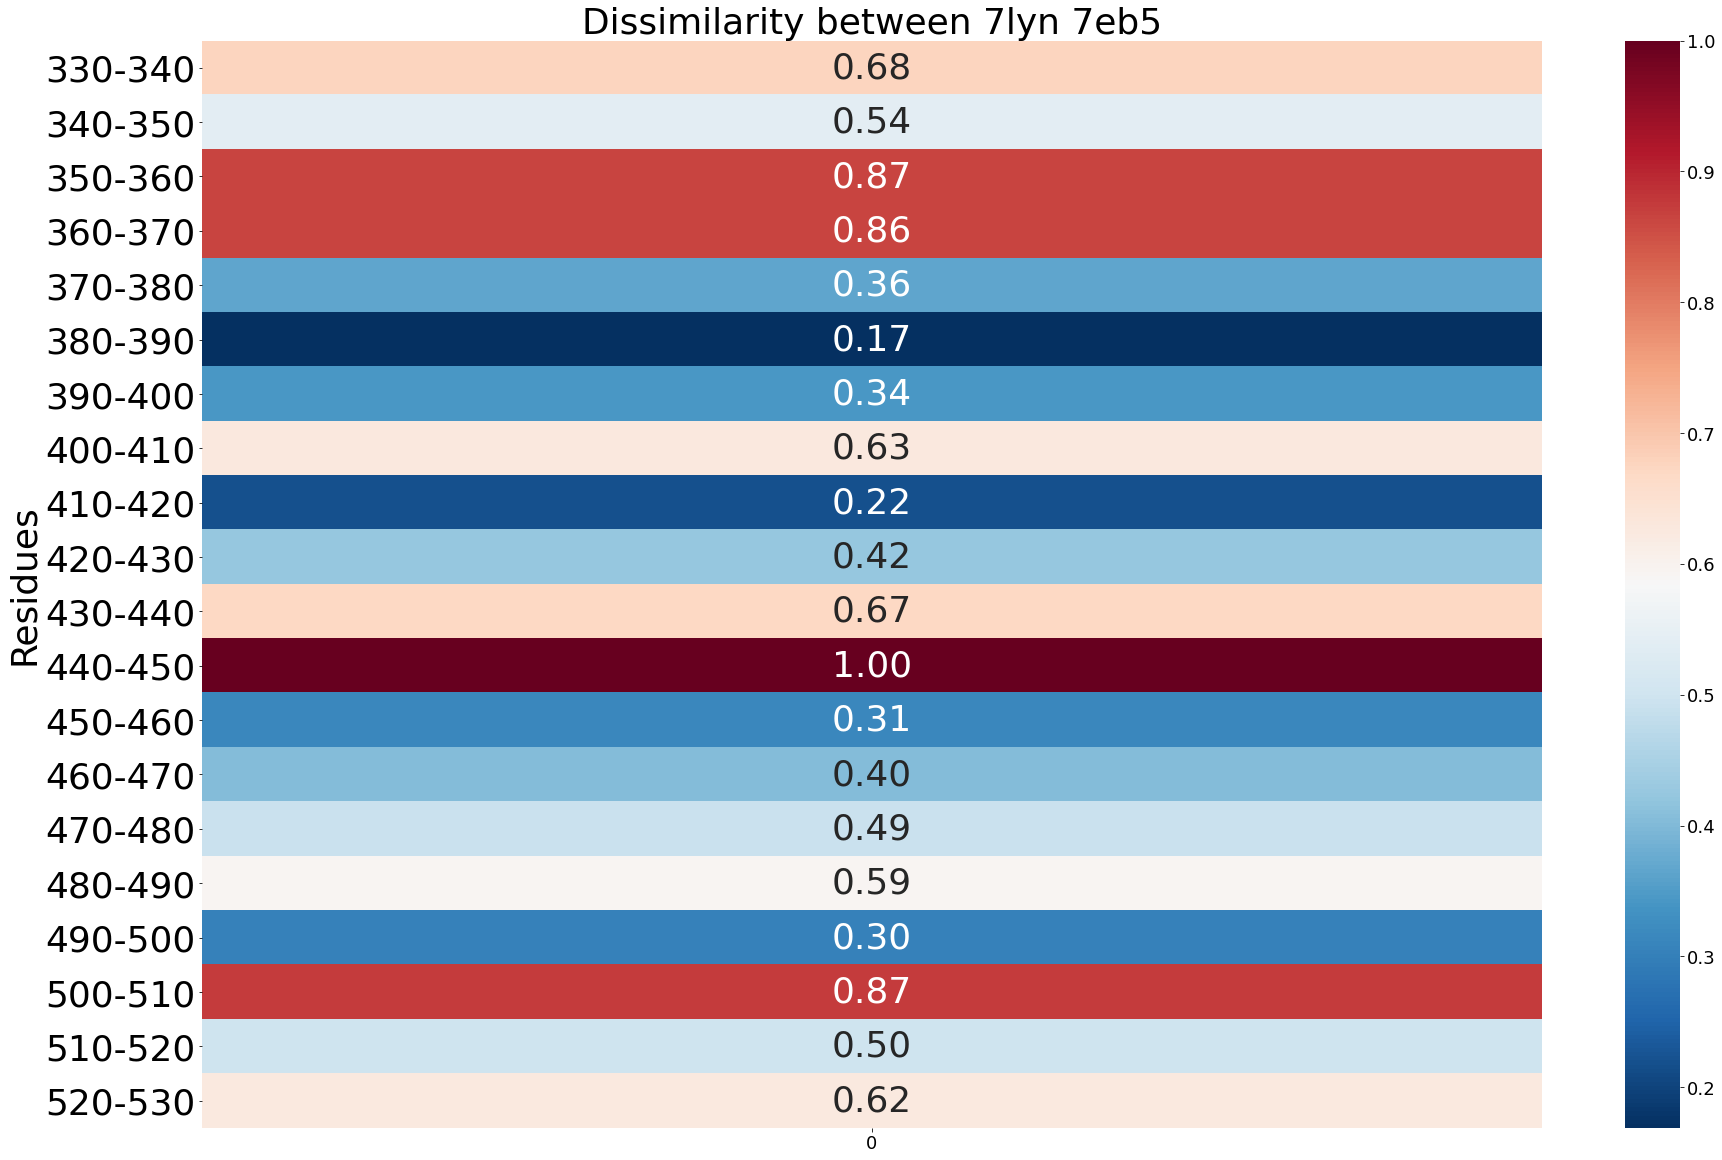

In [168]:
pdb1 = '7lyn'
pdb2 = '7eb5'

pairwise_region = []

for region in range(1,21):
    dict_dist= {}
    metrics = ['cosine', 'euclidean', 'l2', 'manhattan', 'l1', 'hamming', 'chebyshev'] # 'jaccard' excluded as it's for binary data
    for _metric in metrics:
        dict_dist[_metric] = pd.DataFrame(pairwise_distances(X=df[['region_{}'.format(region)]].to_numpy(), metric=_metric), index=df.index, columns=df.index)
        dict_dist[_metric] = lower_triangle(dict_dist[_metric]).stack()
    df_metrics = pd.DataFrame(dict_dist)
    stats_metrics = df_metrics.describe()
    X_min = stats_metrics.loc['min']
    X_max = stats_metrics.loc['max']
    df_metrics_normalized = (df_metrics - X_min) / (X_max - X_min)
    mean_metrics = df_metrics_normalized.mean(axis=1).unstack()


    if pdb1 in mean_metrics[pdb2]:
        pairwise_region.append(mean_metrics[pdb2][[pdb1]])
    elif pdb2 in mean_metrics[pdb1]:
        pairwise_region.append(mean_metrics[pdb1][[pdb2]])
        
      
# Set up the matplotlib figure
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)

fig, ax = plt.subplots(figsize=(30,20)) 

ax = sns.heatmap(pairwise_region, annot=True, fmt='0.2f', cmap="RdBu_r", ax=ax, annot_kws={"size": 36} ) #annot=labels, fmt='',annot_kws={"size": 14}, cmap="RdBu_r") #fmt="0.2f",  cmap="RdBu_r")
#ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 36)
#ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 28)
#ax.set_yticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], fontsize = 36)
ax.set_yticklabels(['330-340','340-350','350-360','360-370','370-380','380-390','390-400','400-410','410-420','420-430','430-440','440-450','450-460','460-470','470-480','480-490','490-500','500-510','510-520','520-530'], rotation=0, fontsize = 36)

plt.ylabel('Residues',fontsize = 36)

plt.title('Dissimilarity between {} {}'.format(pdb1,pdb2), fontsize = 36)
